In [1]:
# 오류 무시
import warnings
warnings.filterwarnings('ignore')

# 머신러닝 돌려보기

In [2]:
import pandas as pd
df_PCOS = pd.read_csv('../Data/pcos_final_select.csv')
df_PCOS.iloc[55,:]

PCOS               0.000000
hair growth        0.000000
Skin darkening     0.000000
Weight gain        0.000000
BMI               25.103878
Waist             35.000000
Fast food          0.000000
Pimples            0.000000
Name: 55, dtype: float64

In [57]:
df_PCOS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PCOS            354 non-null    float64
 1   hair growth     354 non-null    float64
 2   Skin darkening  354 non-null    float64
 3   Weight gain     354 non-null    float64
 4   BMI             354 non-null    float64
 5   Waist           354 non-null    float64
 6   Fast food       354 non-null    float64
 7   Pimples         354 non-null    float64
dtypes: float64(8)
memory usage: 22.2 KB


# 머신러닝 모델 돌려보기

In [58]:
# Target을 제외한 나머지 데이터 추출
x=df_PCOS.iloc[:,1:]
x.head(3)

,hair growth,Skin darkening,Weight gain,BMI,Waist,Fast food,Pimples
0,1.0,1.0,1.0,23.437500,32.0,0.0,1.0
1,1.0,1.0,1.0,30.110279,36.0,1.0,1.0
2,1.0,1.0,1.0,19.606329,32.0,1.0,1.0


In [59]:
# Target인 PCOS (Y/N) 추출하기
y=df_PCOS.iloc[:,0]
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
349    1.0
350    1.0
351    1.0
352    1.0
353    1.0
Name: PCOS, Length: 354, dtype: float64

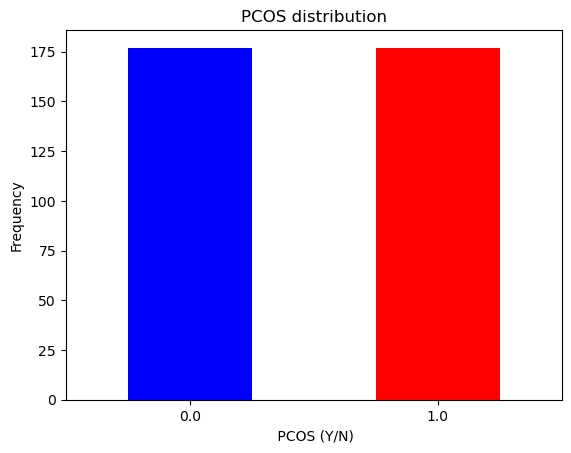

In [60]:
import matplotlib.pyplot as plt
# 차트화 0과 1의 비율
PCOS_count = pd.value_counts(y, sort = True)

PCOS_count.plot(kind = 'bar', rot=0, color=['blue', 'red'])

plt.title("PCOS distribution")
plt.xlabel(" PCOS (Y/N)")
plt.ylabel("Frequency")
plt.show()

### 검증 세트 추가
- 훈련(60%), 검증(20%), 테스트(20%)

In [137]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
    train_test_split(x, y, test_size=0.2)
sub_input, val_input, sub_target, val_target = \
train_test_split(train_input, train_target, test_size=0.2)
# 세트 별 크기
print('Train :', sub_input.shape)
print('Valid :', val_input.shape)
print('Test :', test_input.shape)

Train : (226, 7)
Valid : (57, 7)
Test : (71, 7)


### 여러 모델들을 통해 가장 점수가 좋은 모델을 찾아본다.

## 사용해 볼 모델
- Decision Tree Regression  
- Random Forest Regression  
- Gradient Boosting Regression (GBR)  
- logistic Regression  

# Decision Tree Regression 

In [64]:
# 교차검증을 위한 import
import numpy as np
from sklearn.model_selection import cross_validate

In [65]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(sub_input, sub_target)


print('Train score :', dtr.score(sub_input, sub_target))
print('Valid score :', dtr.score(val_input, val_target))

scores = cross_validate(dtr, train_input, train_target, return_train_score=True)
print('-'*40)
print('교차검증 Train score :',np.mean(scores['train_score']))
print('교차검증 Test score:',np.mean(scores['test_score']))


Train score : 1.0
Valid score : -0.38491048593350397
----------------------------------------
교차검증 Train score : 0.9893603918365679
교차검증 Test score: -0.3374455216859876


# Random Forest Regression 

In [138]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

rfr.fit(sub_input, sub_target)
print('Train score :', rfr.score(sub_input, sub_target))
print('Valid score :', rfr.score(val_input, val_target))

scores = cross_validate(rfr, train_input, train_target, return_train_score=True)
print('-'*40)

print('교차검증 Train score :',np.mean(scores['train_score']))
print('교차검증 Test score:',np.mean(scores['test_score']))


Train score : 0.8864931702344547
Valid score : 0.21084507575757594
----------------------------------------
교차검증 Train score : 0.8840587420369695
교차검증 Test score: 0.15277939096036386


# Gradient Boosting Regression (GBR)  

In [139]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

gbr.fit(sub_input, sub_target)
print('Train score :', gbr.score(sub_input, sub_target))
print('Valid score :', gbr.score(val_input, val_target))

scores = cross_validate(gbr, train_input, train_target, return_train_score=True)
print('-'*40)

print('교차검증 Train score :',np.mean(scores['train_score']))
print('교차검증 Test score:',np.mean(scores['test_score']))

Train score : 0.774632891067998
Valid score : 0.1788553496872286
----------------------------------------
교차검증 Train score : 0.7604201388102169
교차검증 Test score: 0.13367830776877176


# Logistic Regression  

In [165]:
from sklearn.linear_model import LogisticRegression

train_input, test_input, train_target, test_target = \
    train_test_split(x, y, test_size=0.2)
sub_input, val_input, sub_target, val_target = \
train_test_split(train_input, train_target, test_size=0.2)


lr = LogisticRegression()

lr.fit(sub_input, sub_target)
print('Train score :', lr.score(sub_input, sub_target))
print('Valid score :', lr.score(val_input, val_target))

scores = cross_validate(lr, train_input, train_target, return_train_score=True)
print('-'*40)
#print(scores)
print('교차검증 Train score :',np.mean(scores['train_score']))
print('교차검증 Test score:',np.mean(scores['test_score']))
# 81,80 나옴

Train score : 0.8141592920353983
Valid score : 0.8421052631578947
----------------------------------------
교차검증 Train score : 0.8100697828544696
교차검증 Test score: 0.8020676691729323


# 가장 점수가 좋은 Logistic Regression을 모델로 사용하기로 결정

# 점수가 좋게 나와서 바로 사용하도록 한다.

# 최종 테스트

# 답안지 확인

In [167]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(sub_input, sub_target)
print('Train score :', lr.score(sub_input, sub_target))
print('Valid score :', lr.score(val_input, val_target))

scores = cross_validate(lr, train_input, train_target, return_train_score=True)
print('-'*40)
print(scores)
print('교차검증 Train score :',np.mean(scores['train_score']))
print('교차검증 Test score:',np.mean(scores['test_score']))

Train score : 0.8141592920353983
Valid score : 0.8421052631578947
----------------------------------------
{'fit_time': array([0.00999284, 0.01300263, 0.01200271, 0.01200199, 0.01100278]), 'score_time': array([0.00201035, 0.0010004 , 0.0010004 , 0.00200057, 0.00200033]), 'test_score': array([0.78947368, 0.8245614 , 0.80701754, 0.75      , 0.83928571]), 'train_score': array([0.82300885, 0.80088496, 0.80530973, 0.81497797, 0.8061674 ])}
교차검증 Train score : 0.8100697828544696
교차검증 Test score: 0.8020676691729323


In [240]:
pred = lr.predict(test_input)

comparison = pd.DataFrame(
    {'예측값' : pred,
    '정답': test_target}
)
comparison.head(10)

,예측값,정답
195,0.0,1.0
212,1.0,1.0
192,1.0,1.0
259,1.0,1.0
202,1.0,1.0
115,0.0,0.0
55,0.0,0.0
350,0.0,1.0
219,1.0,1.0
97,0.0,0.0


# 정답이 1인 정답지 만들기

In [260]:
pcos_1 = df_PCOS[df_PCOS['PCOS']==1]
pcos_1.reset_index(inplace=True) # index 번호 초기화
pcos_1.drop('index', axis=1,inplace=True)# index 칼럼 삭제

pcos_1_target = pcos_1.iloc[:,0]
pcos_1_input = pcos_1.iloc[:,1:]
pred = lr.predict(pcos_1_input)

comparison = pd.DataFrame(
    {'예측값' : pred,
    '정답': pcos_1_target}
)
print(round((sum(comparison.예측값 == comparison.정답)/len(comparison)),3) *100,'%')

#정답을 맞춘 사람의 최소 확률
print('정답 판단 최소 확률',round(np.min(lr.predict_proba(pcos_1_input)[comparison[(comparison.예측값 == comparison.정답)==True].index][:,1]),3)*100,'%')

#정답을 맞춘 사람의 최대 확률

print('정답 판단 최대 확률',round(np.max(lr.predict_proba(pcos_1_input)[comparison[(comparison.예측값 == comparison.정답)==True].index][:,1]),3)*100,'%')



75.1 %
정답 판단 최소 확률 50.4 %
정답 판단 최대 확률 93.8 %


In [273]:
pd.DataFrame(lr.predict_proba(pcos_1_input)[:,1]).describe()

,0
count,177.000000
mean,0.649546
std,0.249718
min,0.074315
25%,0.503974
50%,0.742714
75%,0.832412
max,0.938449


In [275]:
# 확률 표준편차를 구해서 건강유의를 알려줘야 하는 사람의 기준을 구해줌.
pd.DataFrame(lr.predict_proba(pcos_1_input)[comparison[(comparison.예측값 == comparison.정답)==True].index][:,1]).describe()

,0
count,145.000000
mean,0.642188
std,0.249461
min,0.078004
25%,0.486807
50%,0.731007
75%,0.832412
max,0.938449


# 기준 정해짐

In [276]:
0.642188-0.249461

0.392727

In [194]:

a= [[1.0,1.0,1.0,30.1,46.0,1.0,1.0]] # 걸린사람
b = [[1.0,1.0,1.0,24.000000,34.0,1.0,0.0]] # 안걸린사람
c = [[0.0,0.0,0.0,25.103878,35.0,0.0,0.0]] # 안걸린사람
hs = [[0,0,0,19.35,28,1,1]] # 안걸린사람
jh = [[0,0,1,22.3,26,0,0]] #  안걸린사람
yj = [[0,0,0,19,26,1,0]]# 안걸린사람
pyj = [[0,0,1,23,28,0,1]] # 안걸린사람
lhs = [[1,0,1,27,32,1,1]] #위험한사람

# 유저 입력 값 데이터프레임 만들기
user = pd.DataFrame(lhs)

pred = lr.predict(user)
#print(pred)
pred_proba = lr.predict_proba(user)
print(pred_proba)
print('분석결과 당신은 PCOS에 걸렸을 확률이 ', round(pred_proba[0][1] * 100, 2),'% 입니다.')



[[0.32261586 0.67738414]]
분석결과 당신은 PCOS에 걸렸을 확률이  67.74 % 입니다.
